In [180]:
# Install CatBoost library, a popular gradient boosting framework for machine learning
!pip install catboost

# Importing essential libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # Another library for plotting data
import missingno as msno          # For visualizing missing data
from scipy import stats           # For statistical functions
from scipy.stats import norm      # For working with normal distribution

# Importing machine learning preprocessing and metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error  # For evaluating model performance

# Importing model selection and validation tools
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and performing cross-validation

# Importing statistical modeling tools
import statsmodels.api as sm  # For building statistical models
from sklearn.feature_selection import RFE  # Recursive feature elimination for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF to check multicollinearity

# Importing regression models from different libraries
from catboost import CatBoostRegressor  # CatBoost regression model
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit, LinearRegression, Lasso, ElasticNet  # Various linear models
from sklearn.svm import SVR  # Support Vector Regression
from sklearn import metrics  # For performance evaluation
from sklearn.tree import DecisionTreeRegressor  # Decision Tree for regression
from lightgbm import LGBMRegressor  # LightGBM regression model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  # Ensemble models for regression
from xgboost import XGBRegressor  # XGBoost regression model

# Additional tools for model selection and hyperparameter tuning
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV  # For k-fold cross-validation and grid search

# Importing libraries to handle zip files and file system operations
import zipfile  # To work with zip files
import os       # To interact with the operating system for file paths and directories
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [181]:
# Using wget to download the UK Used Car Dataset from a Dropbox link
# The dataset will be saved as "UK_Used_Car_Dataset.zip" in the current working directory
!wget -O UK_Used_Car_Dataset.zip https://www.dropbox.com/scl/fi/k3ba5m82uprao9xug3plf/100-000-UK-Used-Car-Data-set.zip?rlkey=feafhcpz40vc284l234xf5ba0&st=e1y5abhr&dl=0

# Define the path to the downloaded zip file
zip_file_path = 'UK_Used_Car_Dataset.zip'

# Define the directory where the zip file will be extracted
extract_dir = 'UK_Used_Car_Dataset'

# Define the specific directory within the extracted folder where the CSV files are located
file_dir = 'UK_Used_Car_Dataset/100,000 UK Used Car Data set'

# Extract all the contents of the zip file to the specified directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List all files in the extracted directory to confirm extraction and view contents
extracted_files = os.listdir(file_dir)
print("Extracted files:", extracted_files)

# Filter the list of files to only include CSV files, assuming all relevant data files are in CSV format
csv_files = [file for file in extracted_files if file.endswith('.csv')]

# Read each CSV file into a pandas DataFrame and store them in a dictionary for easy access
# Individual DataFrames for each car brand's data are also created
audi = pd.read_csv(file_dir + '/audi.csv')
audi['brand'] = 'audi'
bmw = pd.read_csv(file_dir + '/bmw.csv')
bmw['brand'] = 'bmw'
cclass = pd.read_csv(file_dir + '/cclass.csv')
focus = pd.read_csv(file_dir + '/focus.csv')
ford = pd.read_csv(file_dir + '/ford.csv')
ford['brand'] = 'ford'
hyundai = pd.read_csv(file_dir + '/hyundi.csv')
hyundai['brand'] = 'hyundai'
hyundai.rename(columns={'tax(£)':'tax'},inplace=True)
merc = pd.read_csv(file_dir + '/merc.csv')
merc['brand'] = 'merc'
skoda = pd.read_csv(file_dir + '/skoda.csv')
skoda['brand'] = 'skoda'
toyota = pd.read_csv(file_dir + '/toyota.csv')
toyota['brand'] = 'toyota'
vauxhall = pd.read_csv(file_dir + '/vauxhall.csv')
vauxhall['brand'] = 'vauxhall'
vw = pd.read_csv(file_dir + '/vw.csv')
vw['brand'] = 'vw'
# Combine all individual DataFrames into a single DataFrame
# This concatenates the data from all the car brands into one large dataset


--2024-08-05 23:16:03--  https://www.dropbox.com/scl/fi/k3ba5m82uprao9xug3plf/100-000-UK-Used-Car-Data-set.zip?rlkey=feafhcpz40vc284l234xf5ba0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd16131ce9dfb625c144210bdc3.dl.dropboxusercontent.com/cd/0/inline/CYFeRPgqu-SLhKGS2c_GJjj6bciXlPt5xrexcOhNAAfA-Iz4sMf8FbYAaN4fTUkGb8FffzU_gm_zH5S5-GjKYtW0NtS0luc8-ijMiva0U2lfbEt1NYqhYsbO_D16ReykrNOGQl2WKSIxbn8emhX5HXd8/file# [following]
--2024-08-05 23:16:04--  https://ucd16131ce9dfb625c144210bdc3.dl.dropboxusercontent.com/cd/0/inline/CYFeRPgqu-SLhKGS2c_GJjj6bciXlPt5xrexcOhNAAfA-Iz4sMf8FbYAaN4fTUkGb8FffzU_gm_zH5S5-GjKYtW0NtS0luc8-ijMiva0U2lfbEt1NYqhYsbO_D16ReykrNOGQl2WKSIxbn8emhX5HXd8/file
Resolving ucd16131ce9dfb625c144210bdc3.dl.dropboxusercontent.com (ucd16131ce9dfb625c144210bdc3.dl.dropboxusercontent.com)... 

In [182]:
# Combine all individual DataFrames into a single DataFrame
# This concatenates the data from all the car brands into one large dataset
full_datasets = pd.concat([audi, bmw, ford, hyundai, merc, skoda, toyota, vauxhall, vw])


In [183]:
full_datasets_cleaned = full_datasets[full_datasets["year"] <= 2020]
# Calculate the age of each car and create a new column 'age_of_car'
# The age is calculated by subtracting the 'year' column from 2020
# The dataset is being collected in the year 2020
full_datasets_cleaned["Car_Age"] = 2020 - full_datasets_cleaned["year"]
# Drop columns that have any missing values (NaN) in the dataset
full_datasets_cleaned = full_datasets_cleaned.dropna(axis=1)
# Drop the original 'year' column from the DataFrame
full_datasets_cleaned = full_datasets_cleaned.drop(columns=["year"])

full_datasets_cleaned = full_datasets_cleaned.reset_index(drop=True)

print("Shape of the cleaned dataset:", full_datasets_cleaned.shape)

Shape of the cleaned dataset: (99186, 10)


<ipython-input-183-7fbf1347ec51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_datasets_cleaned["Car_Age"] = 2020 - full_datasets_cleaned["year"]


In [184]:
# Check for missing values in the combined dataset
# This will return the count of NaN (missing) values in each column of the dataset
full_datasets_cleaned.isna().sum()

model           0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
Car_Age         0
dtype: int64

In [185]:
# Display the cleaned dataset to verify that the columns with missing values have been removed
print("Shape of the dataset:", full_datasets_cleaned.shape)

Shape of the dataset: (99186, 10)


In [186]:
# Capture the list of feature (column) names from the cleaned dataset
features = full_datasets_cleaned.columns

# SIterate over each feature in the dataset
for feature in features:
    # Calculate the number of unique values in the current feature
    unique_values_count = full_datasets_cleaned[feature].nunique()

    # Print the feature name and the count of unique values it contains
    print(f"{feature} : {unique_values_count}")

# Generate descriptive statistics for the cleaned dataset
# Use describe() to calculate summary statistics like mean, std, min, max for each numeric feature
summary_statistics = full_datasets_cleaned.describe()

# Transpose the resulting DataFrame to make the statistics easier to read by rows instead of columns
summary_statistics_transposed = summary_statistics.T
summary_statistics_transposed

model : 195
price : 13236
transmission : 4
mileage : 42213
fuelType : 5
tax : 48
mpg : 208
engineSize : 40
brand : 9
Car_Age : 26


,count,mean,std,min,25%,50%,75%,max
price,99186.0,16805.451606,9866.768844,450.0,9999.0,14495.0,20870.00,159999.0
mileage,99186.0,23058.594126,21148.390071,1.0,7424.5,17460.0,32337.75,323000.0
tax,99186.0,120.298984,63.150672,0.0,125.0,145.0,145.00,580.0
mpg,99186.0,55.166950,16.138556,0.3,47.1,54.3,62.80,470.8
engineSize,99186.0,1.663283,0.557649,0.0,1.2,1.6,2.00,6.6
Car_Age,99186.0,2.912709,2.119570,0.0,1.0,3.0,4.00,50.0


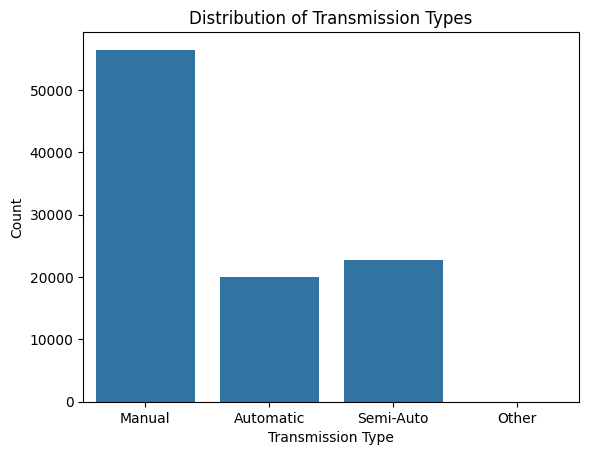

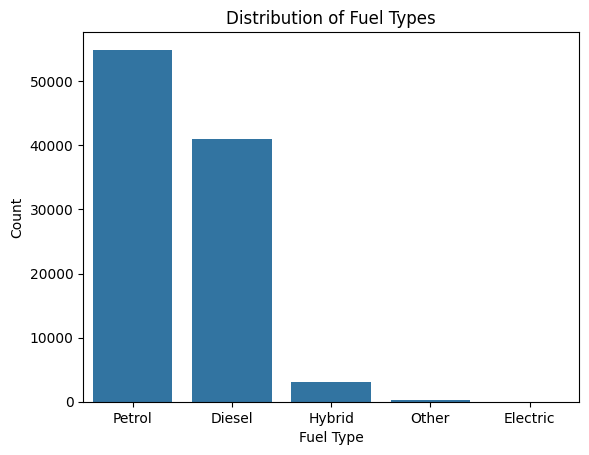

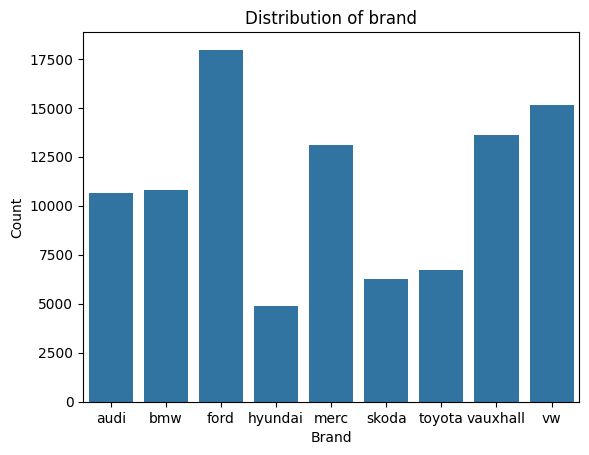

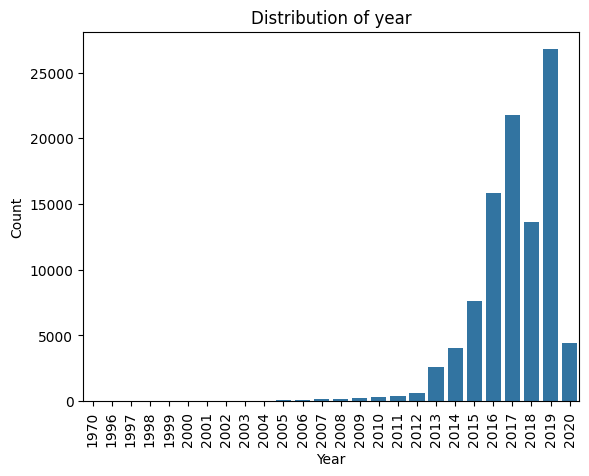

Text(0, 0.5, 'Price')

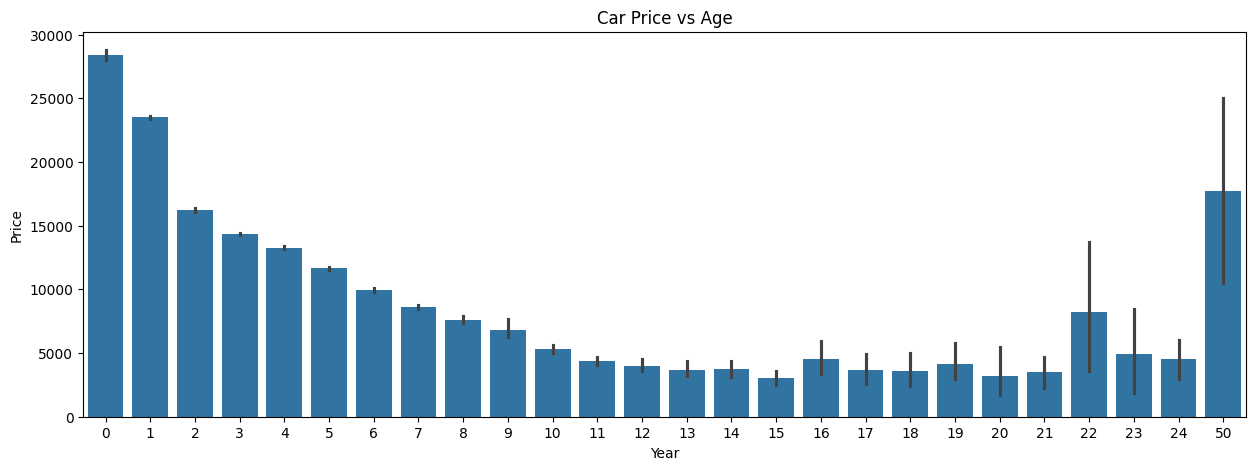

In [187]:
# Plotting the count of each category in the 'transmission' column
sns.countplot(x=full_datasets_cleaned["transmission"])
plt.title("Distribution of Transmission Types")  # Adding a title to the plot
plt.xlabel("Transmission Type")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
plt.show()  # Display the plot

# Plotting the count of each category in the 'fuelType' column
sns.countplot(x=full_datasets_cleaned["fuelType"])
plt.title("Distribution of Fuel Types")  # Adding a title to the plot
plt.xlabel("Fuel Type")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
plt.show()  # Display the plot

# Plotting the count of each category in the 'brand' column
sns.countplot(x=full_datasets_cleaned["brand"])
plt.title("Distribution of brand")  # Adding a title to the plot
plt.xlabel("Brand")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
plt.show()  # Display the plot

# Plotting the count of each category in the 'year' column
sns.countplot(x=2020 - full_datasets_cleaned["Car_Age"])
plt.title("Distribution of year")  # Adding a title to the plot
plt.xlabel("Year")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()  # Display the plot

plt.figure(figsize=(15,5),facecolor='w')
sns.barplot(x = full_datasets_cleaned["Car_Age"], y = full_datasets_cleaned["price"])
plt.title("Car Price vs Age")  # Adding a title to the plot
plt.xlabel("Year")  # Adding a label to the x-axis
plt.ylabel("Price")  # Adding a label to the y-axis

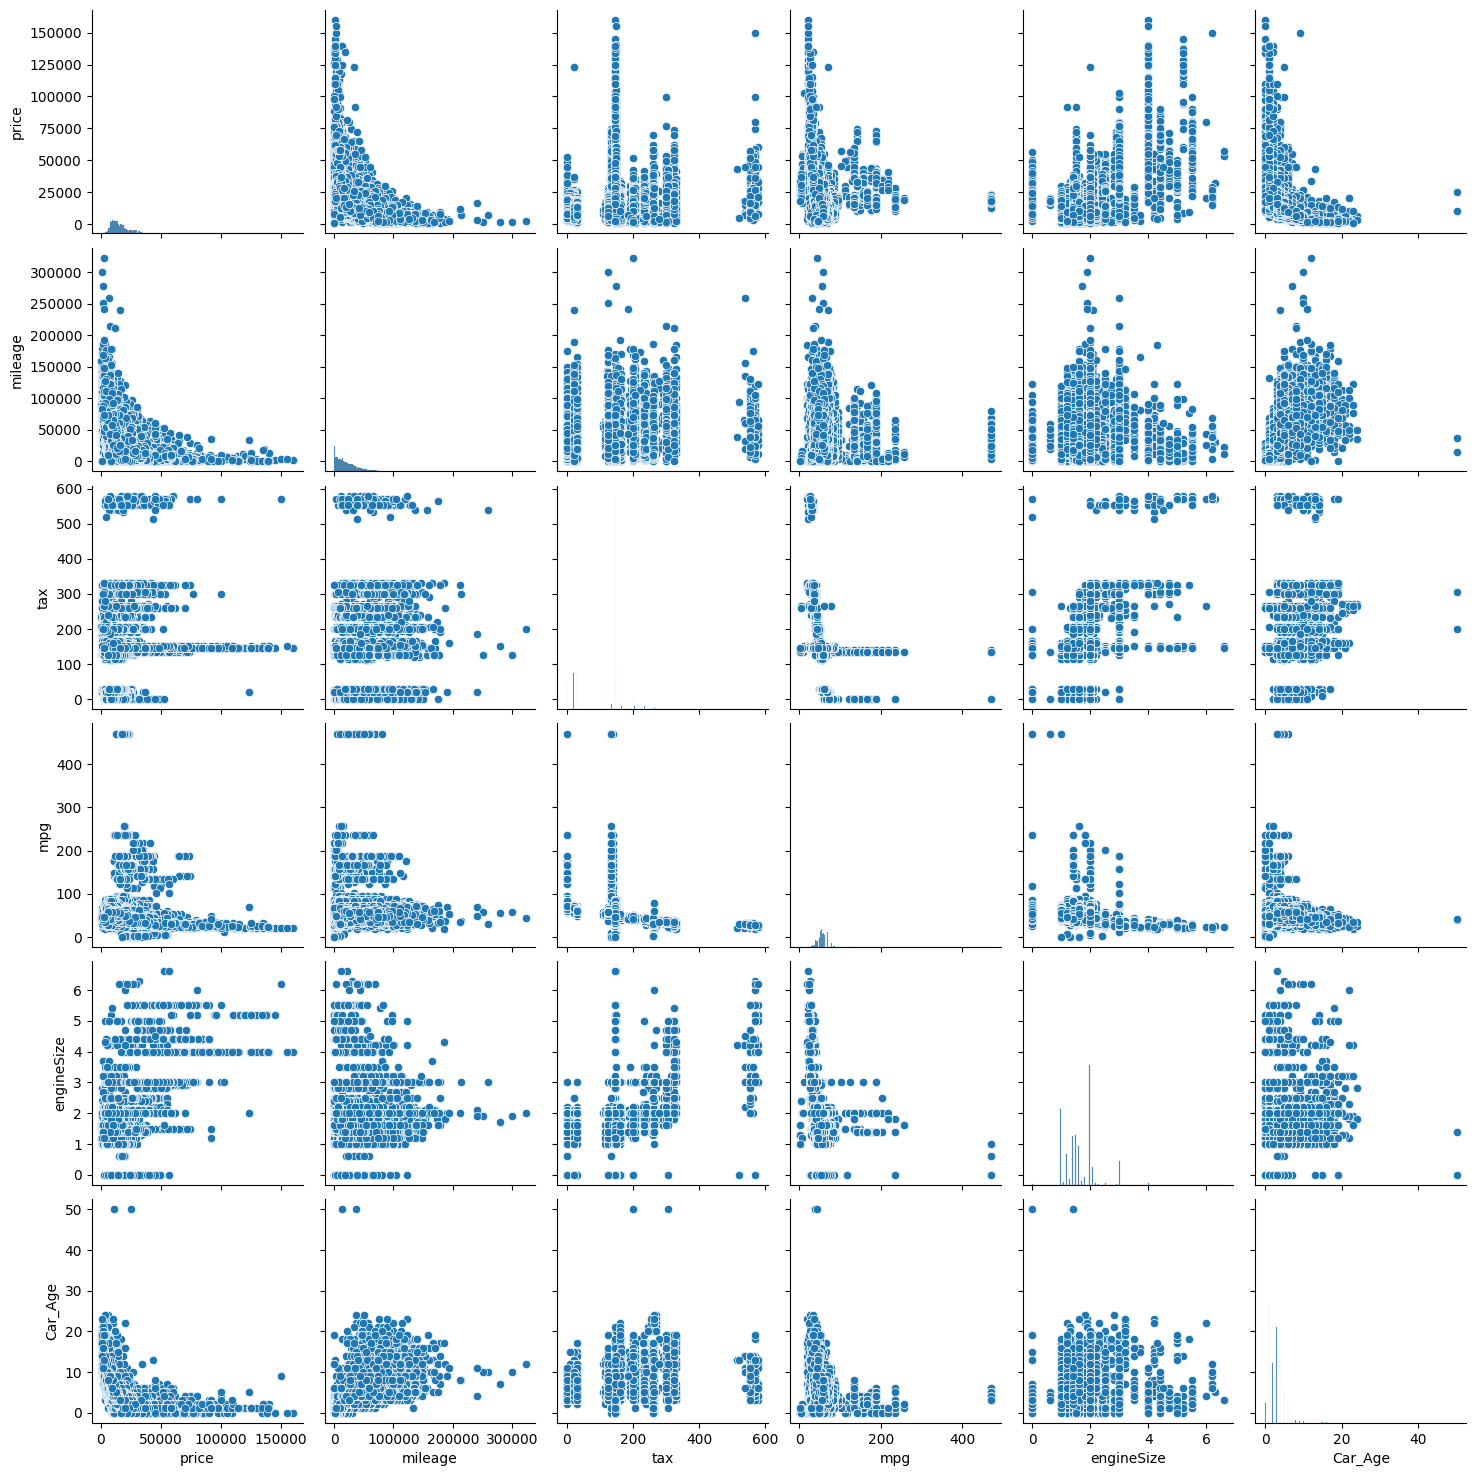

In [188]:
sns.pairplot(full_datasets_cleaned)

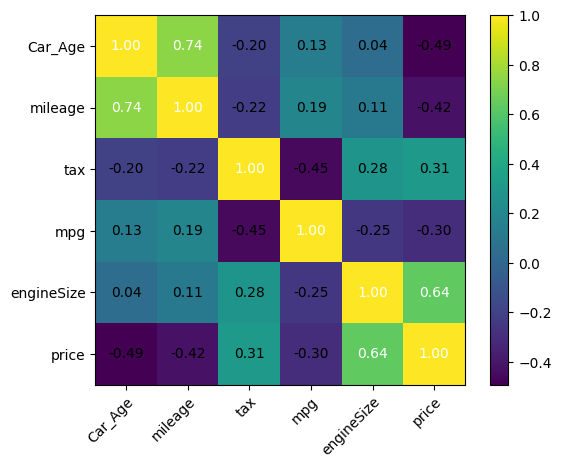

In [189]:
from mlxtend.plotting import heatmap
variables = ['Car_Age',  'mileage',  'tax', 'mpg', 'engineSize', 'price']
cm = full_datasets_cleaned[variables].corr().values
hm = heatmap(
    cm,
    row_names=variables,
    column_names=variables)

In [190]:
full_datasets_cleaned

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,Car_Age
0,A1,12500,Manual,15735,Petrol,150,55.4,1.4,audi,3
1,A6,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,4
2,A1,11000,Manual,29946,Petrol,30,55.4,1.4,audi,4
3,A4,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,3
4,A3,17300,Manual,1998,Petrol,145,49.6,1.0,audi,1
...,...,...,...,...,...,...,...,...,...,...
99181,Eos,5990,Manual,74000,Diesel,125,58.9,2.0,vw,8
99182,Fox,1799,Manual,88102,Petrol,145,46.3,1.2,vw,12
99183,Fox,1590,Manual,70000,Petrol,200,42.0,1.4,vw,11
99184,Fox,1250,Manual,82704,Petrol,150,46.3,1.2,vw,14


In [191]:
full_datasets_cleaned_dummed = pd.get_dummies(full_datasets_cleaned)
full_datasets_cleaned_dummed.head()

,price,mileage,tax,mpg,engineSize,Car_Age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_hyundai,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,12500,15735,150,55.4,1.4,3,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,16500,36203,20,64.2,2.0,4,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,11000,29946,30,55.4,1.4,4,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,16800,25952,145,67.3,2.0,3,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,17300,1998,145,49.6,1.0,1,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [192]:
full_datasets_cleaned_dummed_std = pd.DataFrame(full_datasets_cleaned_dummed, columns = full_datasets_cleaned_dummed.columns)
print(full_datasets_cleaned_dummed_std.shape)
full_datasets_cleaned_dummed_std.head()
X_scaled = full_datasets_cleaned_dummed_std.drop(columns=["price"])

(99186, 219)


In [193]:
X_scaled

,mileage,tax,mpg,engineSize,Car_Age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_hyundai,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,15735,150,55.4,1.4,3,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,36203,20,64.2,2.0,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,29946,30,55.4,1.4,4,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,25952,145,67.3,2.0,3,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1998,145,49.6,1.0,1,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,74000,125,58.9,2.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
99182,88102,145,46.3,1.2,12,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
99183,70000,200,42.0,1.4,11,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
99184,82704,150,46.3,1.2,14,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [194]:
y = full_datasets_cleaned_dummed_std['price']
y_log = np.log(y)
# Split the data into training and validation sets 60/20/20
X_train_val, X_test, y_train_val_log, y_test_log = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)
X_train, X_val, y_train_log, y_val_log = train_test_split(X_train_val, y_train_val_log, test_size=0.25, random_state=42)

# Verify the shape of the concatenated dataframes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Print the shapes of the target dataframes
print(f"y_train shape: {y_train_log.shape}")
print(f"y_val shape: {y_val_log.shape}")
print(f"y_test shape: {y_test_log.shape}")

X_train shape: (59511, 218)
X_val shape: (19837, 218)
X_test shape: (19838, 218)
y_train shape: (59511,)
y_val shape: (19837,)
y_test shape: (19838,)


In [196]:
y_train_val_log

89591     9.877913
68219     9.033961
16980     9.816349
24493     9.432764
11335     9.903388
           ...    
6265     10.402747
54886    10.413253
76820     8.517193
860       9.951801
15795    10.325318
Name: price, Length: 79348, dtype: float64

In [197]:
lr = LinearRegression().fit(X_train_val,y_train_val_log)
y_pred_test_log = pd.DataFrame(lr.predict(X_test))

In [198]:
y_pred_test_log.head()

,0
0,9.333568
1,9.828710
2,9.828756
3,10.054697
4,9.376611


In [199]:
X_test

,mileage,tax,mpg,engineSize,Car_Age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_hyundai,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
31981,14044,150,64.2,1.1,2,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
62387,14258,150,53.3,1.4,2,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
30462,15,145,65.7,2.0,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
21504,24568,145,31.7,2.0,2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
26653,11373,30,54.3,1.0,3,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23917,3541,145,74.3,1.5,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
97622,40181,145,42.8,3.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
89895,18040,145,53.3,2.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18305,75000,30,62.8,2.0,8,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [200]:
y_test_log.head()

31981    9.177714
62387    9.784141
30462    9.878170
21504    9.903238
26653    9.383537
Name: price, dtype: float64

In [201]:
y_pred_test = np.exp(y_pred_test_log)
y_pred_test.rename(columns={0: "price"}, inplace=True)
y_test = np.exp(y_test_log)
y_test = pd.DataFrame(y_test).reset_index(drop=True)

In [202]:
y_pred_test

,price
0,11311.414600
1,18558.989542
2,18559.843792
3,23264.814084
4,11808.932129
...,...
19833,17959.922769
19834,26298.087168
19835,21601.360157
19836,7543.422535


In [203]:
# Evaluate the performance of the linear regression model for the Full  dataset
# Calculate R²
r2 = r2_score(y_test, y_pred_test)
print(f'R² on test data: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on test data: {mse}')

# Calculate Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Mean Absolute Percentage Error on test data: {mape}')

R² on test data: 0.9291827083644336
Mean Squared Error on test data: 6759186.190767143
Mean Absolute Percentage Error on test data: 0.09641567776369325


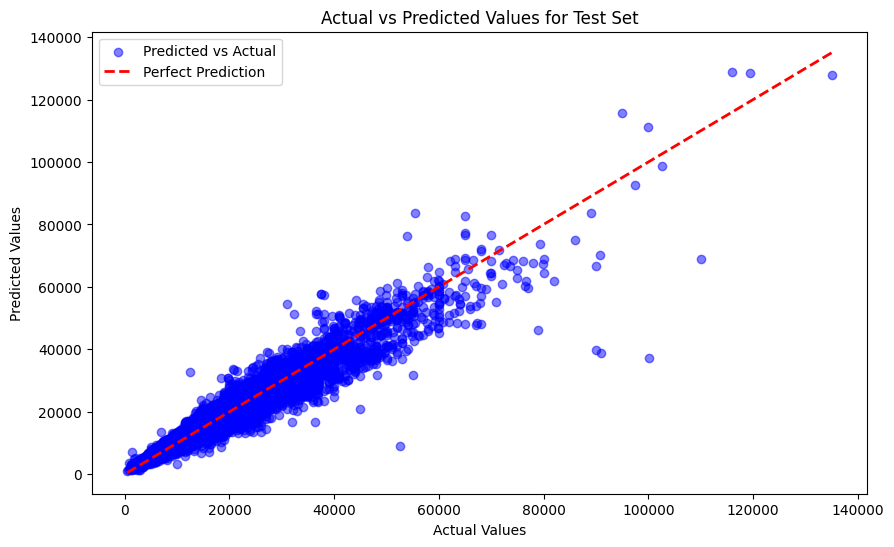

In [204]:
# Plotting y_test vs y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Test Set')
plt.legend()

In [205]:
X_train_val.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'Car_Age', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       'model_ 5 Series',
       ...
       'fuelType_Petrol', 'brand_audi', 'brand_bmw', 'brand_ford',
       'brand_hyundai', 'brand_merc', 'brand_skoda', 'brand_toyota',
       'brand_vauxhall', 'brand_vw'],
      dtype='object', length=218)

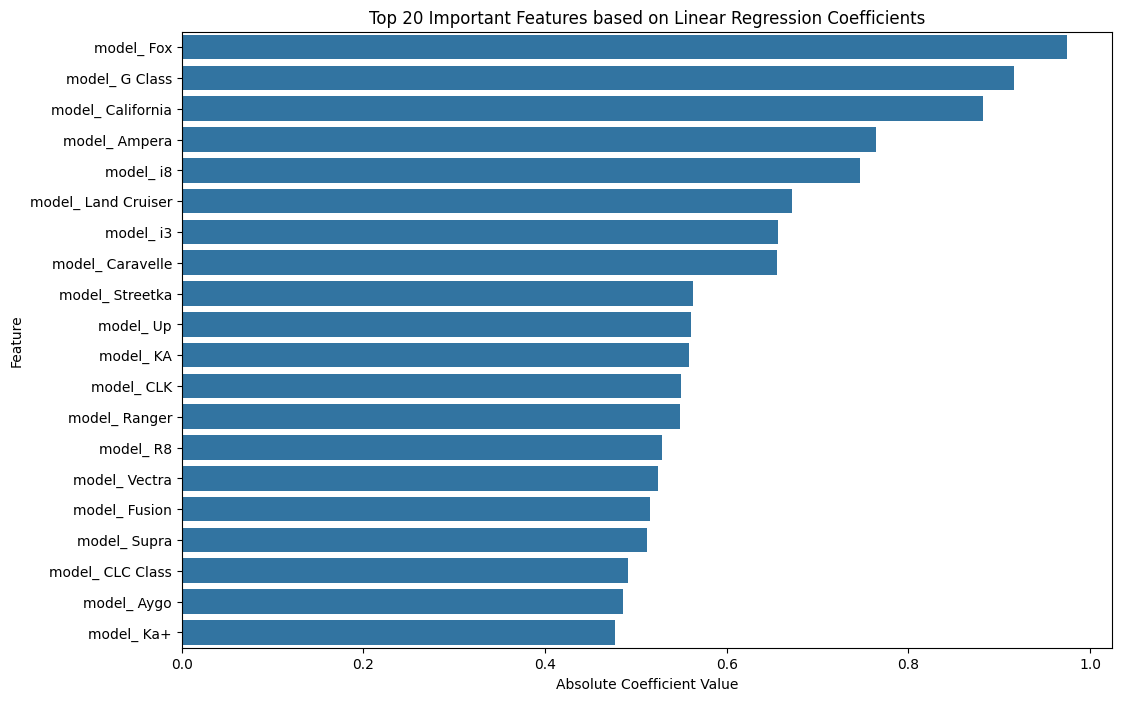

In [206]:
# Calculate feature importance based on coefficients for Linear Regression

feature_importance = pd.Series(np.abs(lr.coef_), index=X_train_val.columns)

# Sort the feature importance in descending order and select the top 20 features
top_20_features = feature_importance.sort_values(ascending=False).head(20)

# Plot the top 20 feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_features, y=top_20_features.index)
plt.title('Top 20 Important Features based on Linear Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

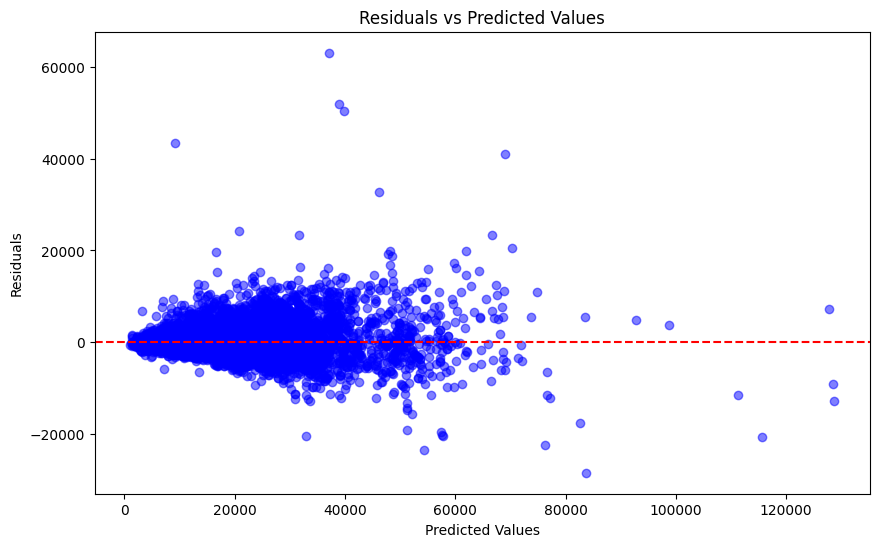

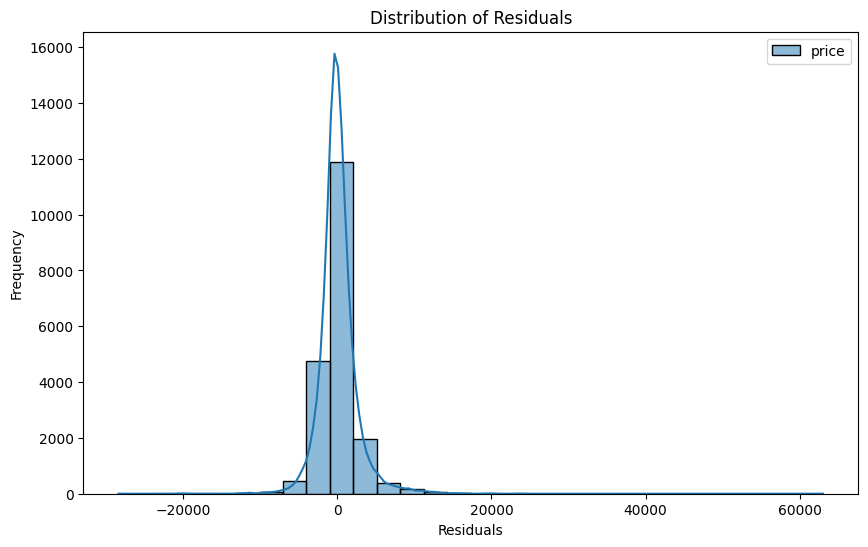

In [207]:
# Calculate residuals
residuals = y_test - y_pred_test

# Plot the residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot a histogram of the residuals to check their distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Number of outliers in training set: 930
Proportion of outliers in training set: 0.0117


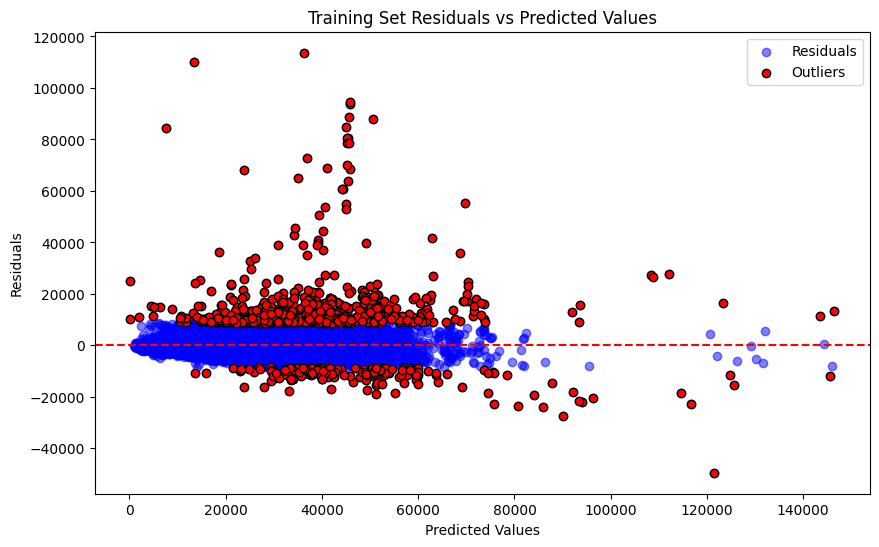

In [208]:
# Calculate residuals for the training set
y_pred_train_val_log = lr.predict(X_train_val)
y_pred_train_val = np.exp(y_pred_train_val_log)
y_train_val = np.exp(y_train_val_log)
# Calculate residuals for the training set
train_residuals = y_train_val - y_pred_train_val

# Determine outliers in the training set
train_residuals_mean = np.mean(train_residuals)
train_residuals_std = np.std(train_residuals)
train_outliers = np.abs(train_residuals - train_residuals_mean) > 3 * train_residuals_std

# Number of outliers
print(f"Number of outliers in training set: {np.sum(train_outliers)}")

# Proportion of outliers
print(f"Proportion of outliers in training set: {np.sum(train_outliers) / len(train_residuals):.4f}")

# Plot residuals with outliers highlighted for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_val, train_residuals, alpha=0.5, label='Residuals', color='blue')
plt.scatter(y_pred_train_val[train_outliers], train_residuals[train_outliers], color='red', label='Outliers', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Training Set Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [209]:
train_non_outliers_mask = np.abs(train_residuals - train_residuals_mean) <= 3 * train_residuals_std

In [210]:
# Filter the datasets to keep only non-outliers
X_train_val_less_outlier = X_train_val[train_non_outliers_mask]
y_train_val_less_outlier = y_train_val[train_non_outliers_mask]

In [211]:
y_train_val_less_outlier

89591    19495.0
68219     8383.0
16980    18331.0
24493    12491.0
11335    19998.0
          ...   
6265     32950.0
54886    33298.0
76820     5000.0
860      20990.0
15795    30495.0
Name: price, Length: 78418, dtype: float64

In [212]:
# Instantiate the Linear Regression model
lr_model_less_outlier = LinearRegression()
y_train_val_less_outlier_log = np.log(y_train_val_less_outlier)
# Train the model on the cleaned training dataset
lr_model_less_outlier.fit(X_train_val_less_outlier, y_train_val_less_outlier_log)

# Make predictions on the cleaned test set
y_pred_test_less_outlier_log = lr_model_less_outlier.predict(X_test)

y_pred_test_less_outlier = np.exp(y_pred_test_less_outlier_log)
# Calculate the Mean Absolute Percentage Error (MAPE) on the cleaned test set
mape_lr = mean_absolute_percentage_error(y_test, y_pred_test_less_outlier)

# Display the MAPE
print(f"Mean Absolute Percentage Error (MAPE) on the cleaned test set: {mape_lr:.4f}")

Mean Absolute Percentage Error (MAPE) on the cleaned test set: 0.0958


In [213]:
X_scaled

,mileage,tax,mpg,engineSize,Car_Age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_hyundai,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,15735,150,55.4,1.4,3,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,36203,20,64.2,2.0,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,29946,30,55.4,1.4,4,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,25952,145,67.3,2.0,3,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1998,145,49.6,1.0,1,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,74000,125,58.9,2.0,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
99182,88102,145,46.3,1.2,12,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
99183,70000,200,42.0,1.4,11,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
99184,82704,150,46.3,1.2,14,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [214]:
# Assuming X_train_val and y_train_val are already defined
kf = KFold(n_splits=6, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []
mape_scores = []
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)
# Custom cross-validation loop
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Log-transform the target variable
    y_train_log = np.log(y_train)

    # Train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train_log)

    # Predict and back-transform the predictions
    y_val_pred_log = lr.predict(X_val)
    y_val_pred = np.exp(y_val_pred_log)

    # Calculate metrics
    mse_scores.append(mean_squared_error(y_val, y_val_pred))
    r2_scores.append(r2_score(y_val, y_val_pred))
    mape_scores.append(mean_absolute_percentage_error(y_val, y_val_pred))

# Output the cross-validation results
print(f'Cross-validation MSE scores for each fold: {mse_scores}')
print(f'Average Cross-validation MSE: {np.mean(mse_scores)}')

print(f'Cross-validation R² scores for each fold: {r2_scores}')
print(f'Average Cross-validation R²: {np.mean(r2_scores)}')

print(f'Cross-validation MAPE scores for each fold: {mape_scores}')
print(f'Average Cross-validation MAPE: {np.mean(mape_scores)}')

Cross-validation MSE scores for each fold: [6966417.668942298, 6497067.591060083, 8561112.866173245, 8248503.253148403, 9558495.618280912, 9045924.575086556]
Average Cross-validation MSE: 8146253.595448583
Cross-validation R² scores for each fold: [0.9286564120559809, 0.9289574496137336, 0.9117874298067022, 0.9180466768110309, 0.903453942125852, 0.9079401522015134]
Average Cross-validation R²: 0.9164736771024687
Cross-validation MAPE scores for each fold: [0.0966155902477442, 0.09603836662182871, 0.09689225964644509, 0.09615192289356526, 0.09594468038532723, 0.09611306842869934]
Average Cross-validation MAPE: 0.09629264803726832
